In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

# Base parameters
S0 = 100.0   # Current stock price
K = 100.0    # Strike price
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility (20%)
T = 1.0      # Time to maturity (1 year)

S0, K, r, sigma, T


(100.0, 100.0, 0.05, 0.2, 1.0)

In [3]:
def black_scholes_call(S0, K, r, sigma, T):
    """
    Price a European call option using the Black-Scholes formula.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

bs_price = black_scholes_call(S0, K, r, sigma, T)
bs_price


np.float64(10.450583572185565)

In [4]:
def monte_carlo_call(S0, K, r, sigma, T, n_paths=100000, seed=42):
    """
    Price a European call option using Monte Carlo simulation.
    """
    rng = np.random.default_rng(seed)
    Z = rng.standard_normal(n_paths)  # draw N(0,1) shocks

    # Simulate terminal stock prices under risk-neutral measure
    ST = S0 * np.exp(
        (r - 0.5 * sigma**2) * T +
        sigma * np.sqrt(T) * Z
    )

    payoffs = np.maximum(ST - K, 0.0)      # payoff max(S_T - K, 0)
    discounted = np.exp(-r * T) * payoffs  # discount back to today

    return discounted.mean()

mc_price = monte_carlo_call(S0, K, r, sigma, T, n_paths=100000)
bs_price, mc_price, mc_price - bs_price


(np.float64(10.450583572185565),
 np.float64(10.420541193153113),
 np.float64(-0.03004237903245155))

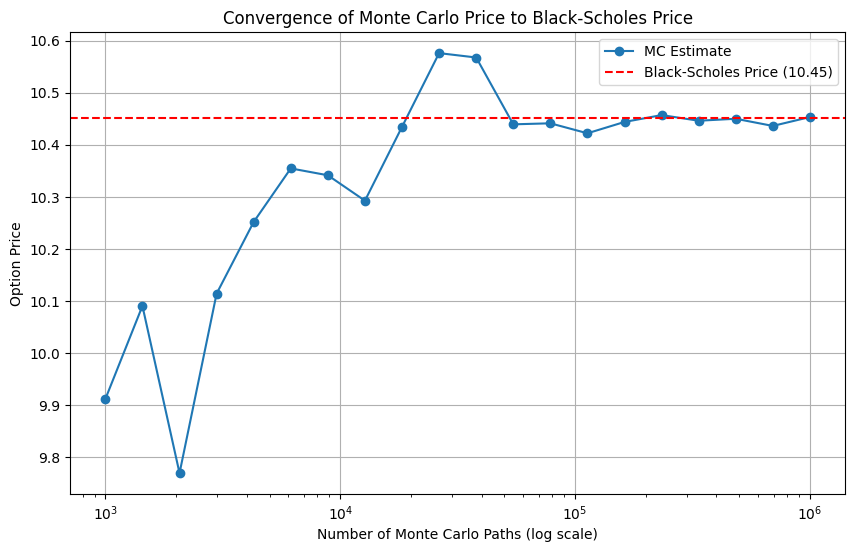

In [5]:
# Monte Carlo convergence test
path_counts = np.logspace(3, 6, 20, dtype=int)  # from 1,000 to 1,000,000 paths
mc_estimates = []

for n in path_counts:
    price = monte_carlo_call(S0, K, r, sigma, T, n_paths=n)
    mc_estimates.append(price)

plt.figure(figsize=(10, 6))
plt.plot(path_counts, mc_estimates, marker='o', label="MC Estimate")
plt.axhline(bs_price, color='red', linestyle='--', label=f"Black-Scholes Price ({bs_price:.2f})")
plt.xscale("log")
plt.xlabel("Number of Monte Carlo Paths (log scale)")
plt.ylabel("Option Price")
plt.title("Convergence of Monte Carlo Price to Black-Scholes Price")
plt.legend()
plt.grid(True)
plt.show()


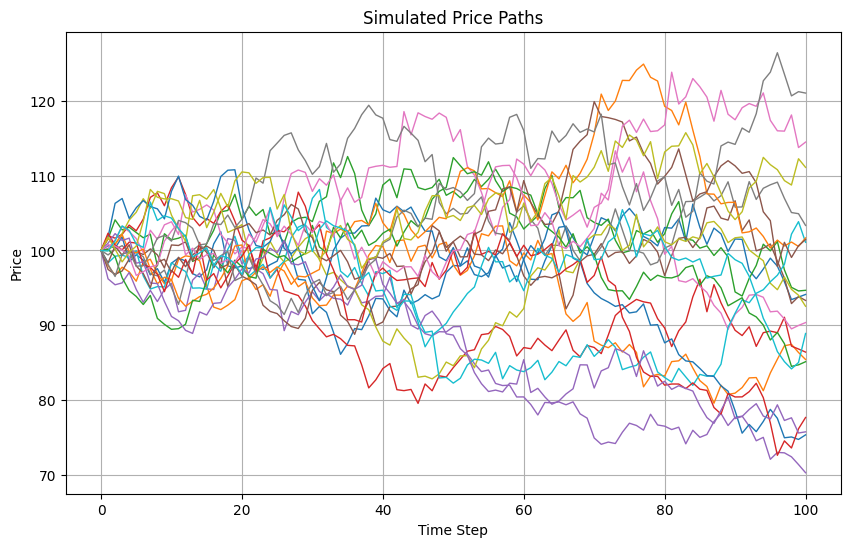

In [6]:
# Simulate multiple price paths for visualization
def simulate_paths(S0, r, sigma, T, n_paths=10, seed=42):
    rng = np.random.default_rng(seed)
    timesteps = 100
    dt = T / timesteps
    
    paths = np.zeros((n_paths, timesteps + 1))
    paths[:, 0] = S0
    
    for t in range(1, timesteps + 1):
        Z = rng.standard_normal(n_paths)
        paths[:, t] = paths[:, t-1] * np.exp(
            (r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
        )
        
    return paths

paths = simulate_paths(S0, r, sigma, T, n_paths=20)

plt.figure(figsize=(10,6))
for i in range(20):
    plt.plot(paths[i], lw=1)
plt.title("Simulated Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.show()


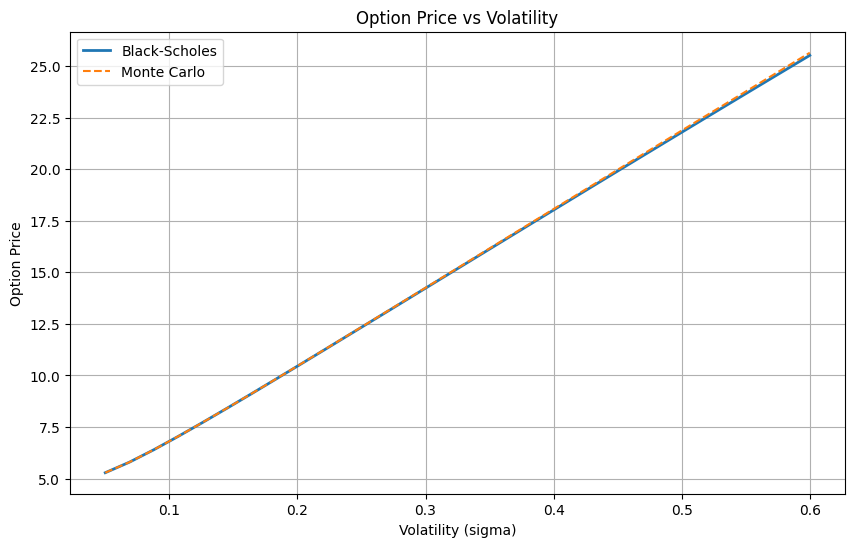

In [7]:
# Volatility sensitivity (similar to Vega behavior)

vols = np.linspace(0.05, 0.60, 30)  # from 5% to 60%
bs_prices_vol = [black_scholes_call(S0, K, r, v, T) for v in vols]
mc_prices_vol = [monte_carlo_call(S0, K, r, v, T, n_paths=50000) for v in vols]

plt.figure(figsize=(10,6))
plt.plot(vols, bs_prices_vol, label="Black-Scholes", linewidth=2)
plt.plot(vols, mc_prices_vol, label="Monte Carlo", linestyle="--")
plt.xlabel("Volatility (sigma)")
plt.ylabel("Option Price")
plt.title("Option Price vs Volatility")
plt.grid(True)
plt.legend()
plt.show()


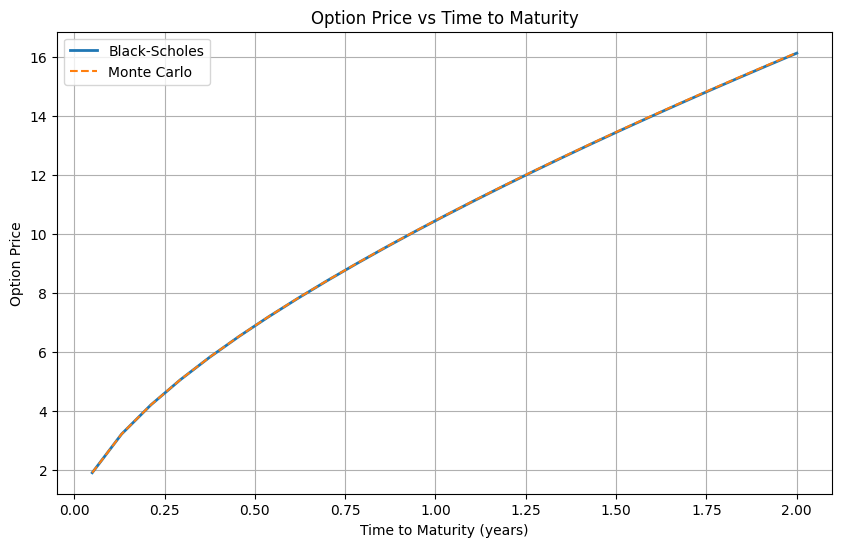

In [8]:
# Time-to-maturity sensitivity

Ts = np.linspace(0.05, 2.0, 25)  # from 0.05 years (~18 days) to 2 years
bs_prices_T = [black_scholes_call(S0, K, r, sigma, t) for t in Ts]
mc_prices_T = [monte_carlo_call(S0, K, r, sigma, t, n_paths=50000) for t in Ts]

plt.figure(figsize=(10,6))
plt.plot(Ts, bs_prices_T, label="Black-Scholes", linewidth=2)
plt.plot(Ts, mc_prices_T, "--", label="Monte Carlo")
plt.xlabel("Time to Maturity (years)")
plt.ylabel("Option Price")
plt.title("Option Price vs Time to Maturity")
plt.grid(True)
plt.legend()
plt.show()


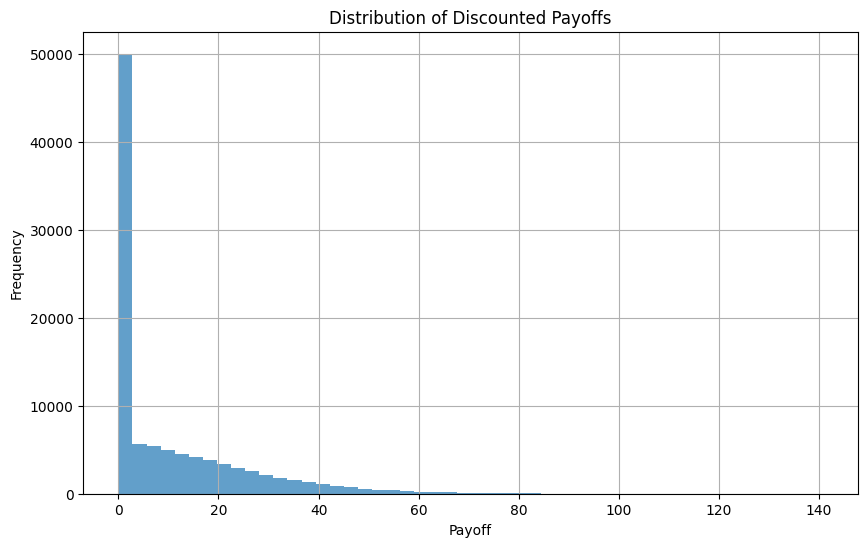

In [9]:
# Distribution of discounted payoffs
payoffs = np.exp(-r * T) * np.maximum(
    S0 * np.exp(
        (r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*np.random.standard_normal(100000)
    ) - K,
    0
)

plt.figure(figsize=(10,6))
plt.hist(payoffs, bins=50, alpha=0.7)
plt.title("Distribution of Discounted Payoffs")
plt.xlabel("Payoff")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# **Option Pricing with Black–Scholes and Monte Carlo Simulation**

This project implements and analyzes two fundamental approaches for pricing European call options:

1. the closed-form **Black–Scholes formula**, and  
2. a **Monte Carlo simulation** under the risk-neutral measure.

The goal is to compare the analytical model with a numerical approximation, visualize their behavior, and build a deeper understanding of option pricing and stochastic modeling.

---

## **1. Introduction**

Option pricing is a core topic in quantitative finance and financial engineering.  
The Black–Scholes model provides a closed-form solution for pricing European options, while Monte Carlo simulation offers a flexible numerical method that can be applied even when analytical solutions do not exist.

In this project, I:

- implemented Black–Scholes and Monte Carlo pricing in Python,  
- simulated stock price paths under geometric Brownian motion,  
- analyzed how the Monte Carlo estimate converges to the analytical value,  
- visualized how volatility and time-to-maturity affect option value,  
- and explored the payoff distribution of a European call.

All results were generated through simulation — **no external market data was required**.

---

## **2. Model Overview**

### **Black–Scholes Formula (European Call)**

$$
d_1 = \frac{\ln(S_0/K) + (r + 0.5\sigma^2)T}{\sigma\sqrt{T}},
\qquad 
d_2 = d_1 - \sigma\sqrt{T}
$$

$$
C = S_0 \, N(d_1) - K e^{-rT} N(d_2)
$$

### **Monte Carlo Simulation**

Under the risk-neutral measure:

$$
S_T = S_0 \exp\left((r - 0.5\sigma^2)T + \sigma\sqrt{T}Z\right),
\qquad Z \sim N(0,1)
$$

The discounted payoff estimate is:

$$
C_{\text{MC}} = e^{-rT} \, \mathbb{E}[\max(S_T - K, 0)]
$$

---

## **3. Key Results**

| **Method**                    | **Estimated Price** |
|------------------------------|----------------------|
| Black–Scholes                | ~10.45               |
| Monte Carlo (100,000 paths)  | ~10.42               |

The Monte Carlo estimate becomes more accurate as the number of paths increases.

---

## **4. Visualizations**

### ✔ Monte Carlo Convergence  
Shows how the simulation converges toward the analytical Black–Scholes price.

### ✔ Simulated Price Paths (GBM)  
Multiple simulated stock paths following geometric Brownian motion.

### ✔ Option Price vs Volatility  
Illustrates how option value increases with volatility (Vega effect).

### ✔ Option Price vs Time to Maturity  
Shows how additional time increases option value (Theta behavior).

### ✔ Distribution of Discounted Payoffs  
A right-skewed distribution reflecting the asymmetric payoff of a call option.

---

## **5. Why No External Market Data Was Used**

This project is **model-based**, not data-driven.

Both Black–Scholes and Monte Carlo rely on theoretical stochastic processes, so:

- no price history is required,  
- all plots are generated using simulated data,  
- and the purpose is to understand pricing models, not historical performance.

This is standard in quantitative finance when learning pricing engines.

---

## **6. Project Structure**

```
option-pricing-bs-mc/
│
├── notebooks/
│   └── option_pricing_bs_mc.ipynb     # Main analysis notebook
│
├── src/
│   └── __init__.py                    # Placeholder for future modules
│
├── README.md                          # Documentation
└── requirements.txt                   # Python dependencies
```

---

## **7. Skills Demonstrated**

- Option pricing theory  
- Black–Scholes model  
- Monte Carlo simulation  
- Risk-neutral valuation  
- Stochastic processes (GBM)  
- Data visualization  
- Python (NumPy, SciPy, Matplotlib)  
- Jupyter notebook workflow  
- Reproducible project organization  

---

## **8. Future Improvements**

- Pricing put and exotic options  
- Computing Greeks  
- Implementing variance reduction techniques  
- Euler vs exact GBM discretization comparison  
- Extending to stochastic volatility (Heston model)  

---

## **9. Conclusion**

This project provides a complete pipeline for pricing a European call option using both analytical and simulation-based methods. It strengthened my understanding of stochastic modeling, numerical convergence, and the mathematical foundations of derivative pricing — essential skills for quantitative finance and financial engineering.










